In [65]:
# Import libraries
import matplotlib.pyplot as plt
import scipy.signal
from scipy.io import readsav
import numpy as np
from ipywidgets import interact

In [66]:
# System parameters
PRF = 3300 # pulse repetition frequency [Hz] (inverse of PRI)
L_a = 4.8 # antenna length [m]
# Doppler bandwidth depends on the antenna length and satellite velocity
pwb = 2800 # processed Doppler bandwidth [Hz]
Br = 100e6 # Chirp bandwidth in range [Hz]
Fr = 1.1*Br # Sampling frequency in range [Hz]

In [67]:
# Read the sav data 
data = readsav('compl_refl_city.sav')

In [68]:
complex_refl = data["compl_refl"]
complex_refl = complex_refl.astype(np.complex128)  # The data are complex

n_rg =complex_refl.shape[1] # Nunmber of samples in range 
n_az =complex_refl.shape[0] # Nunmber of samples in azimuth 
print(f"{n_az} x {n_rg} samples")

4096 x 4096 samples


In [69]:
from numpy.fft import fft, fftshift

In [70]:
s_1 = fftshift(fft(complex_refl, axis=0), axes=0) # Range compression

Text(0.5, 1.0, 'Azimuth FFT')

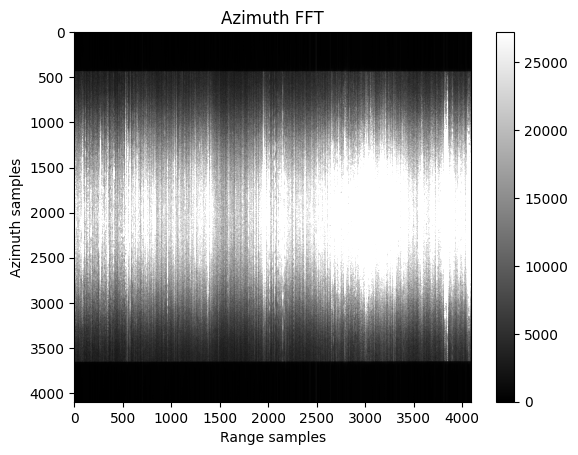

In [71]:
# Mean value of the amplitude
mean_value_s_1 = np.mean(np.abs(s_1))

plt.figure()
plt.imshow(np.abs(s_1),vmin=0,vmax=2*mean_value_s_1,aspect="auto",cmap="gray")
plt.xlabel("Range samples")
plt.ylabel("Azimuth samples")
plt.colorbar()
plt.title("Azimuth FFT")

In [72]:
def f2i(bw, data_bw, N):
    """
    Maps a frequency bandwith `bw` to a pair of indices in the zero-centered FFT array
    
    bw: bandwidth [Hz]
    data_bw: bandwidth of the data [Hz]
    N: number of samples
    
    Returns: (i0, i1) indices
    """
    r = int(N*bw/(2*data_bw))
    return (N//2-r, N//2+r)

In [73]:
pwb = 2600 # processed Doppler bandwidth [Hz]

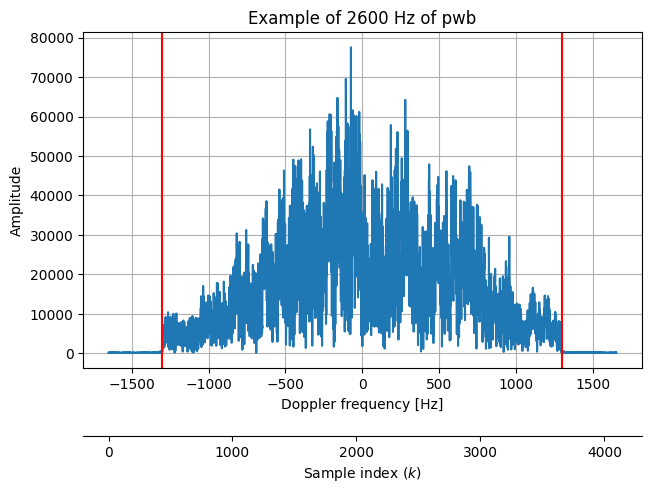

In [74]:
f_dopp = np.linspace(-PRF/2,PRF/2,n_az)
fig, ax = plt.subplots(layout='constrained')
ax.plot(f_dopp,np.abs(s_1[:,0]))
ax.axvline(x=-pwb/2,color="red")
ax.axvline(x=pwb/2,color="red")
ax.set_xlabel("Doppler frequency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
ax.set_title(f"Example of {pwb} Hz of pwb")
secax = ax.secondary_xaxis(-0.2, functions=(lambda x: (x/PRF+1/2)*n_az, lambda x: x))
secax.set_xlabel("Sample index ($k$)")
plt.show()

In [79]:
def plot_restricted_bandwidth_azimuth(pwb, data, prf):
    n_az = data.shape[0]
    i0, i1 = f2i(pwb, prf, n_az)
    data_cp = data.copy()
    data_cp[:i0] = 0
    data_cp[i1:] = 0
    # Frequency plot
    fig, axs = plt.subplots(1, 2, layout='constrained')
    # increase figure size in cm
    fig.set_size_inches(18, 10)
    axs[0].plot(f_dopp, np.abs(data_cp[:,0]))
    axs[0].axvline(x=-pwb/2,color="red")
    axs[0].axvline(x=pwb/2,color="red")
    axs[0].set_xlabel("Doppler frequency [Hz]")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid()
    axs[0].set_title(f"Limiting to {pwb} Hz of pwb")
    secax = axs[0].secondary_xaxis(-0.1, functions=(lambda x: (x/prf+1/2)*n_az, lambda x: x))
    secax.set_xlabel("Sample index ($k$)")

    # Reconstruct the image with the inverse FFT
    rc = np.fft.ifft(data_cp, axis=0)
    # Mean value of the amplitude
    mean_value_rc = np.mean(np.abs(rc))

    # 2d plot
    axs[1].imshow(np.abs(rc),vmin=0,vmax=2*mean_value_rc,aspect="auto",cmap="gray")
    axs[1].set_xlabel("Range samples")
    axs[1].set_ylabel("Azimuth samples")
    # set image to square aspect ratio
    axs[1].set_aspect('equal')
    plt.show()

In [80]:
interact(lambda pwb: plot_restricted_bandwidth_azimuth(pwb, s_1, PRF), pwb=(100, 3000, 100))

interactive(children=(IntSlider(value=1500, description='pwb', max=3000, min=100, step=100), Output()), _dom_c…

<function __main__.<lambda>(pwb)>

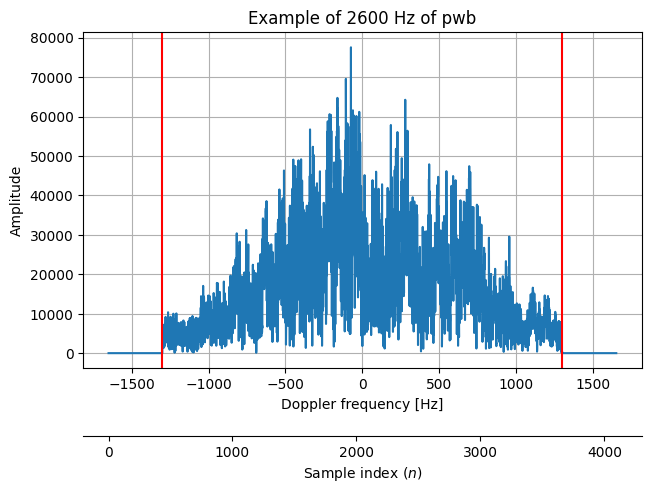

In [77]:
# We zero the values outside the Doppler bandwidth
i0, i1 = f2i(pwb, PRF, n_az)
s_1[:i0] = 0
s_1[i1:] = 0
fig, ax = plt.subplots(layout='constrained')
ax.plot(f_dopp,np.abs(s_1[:,0]))
ax.axvline(x=-pwb/2,color="red")
ax.axvline(x=pwb/2,color="red")
ax.set_xlabel("Doppler frequency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
ax.set_title(f"Example of {pwb} Hz of pwb")
secax = ax.secondary_xaxis(-0.2, functions=(lambda x: (x/PRF+1/2)*n_az, lambda x: x))
secax.set_xlabel("Sample index ($n$)")
plt.show()

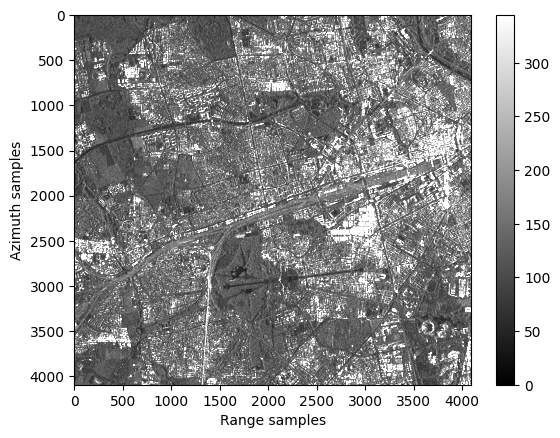

In [78]:
# Reconstruct the image with the inverse FFT
rc = np.fft.ifft(s_1, axis=0)

# Mean value of the amplitude
mean_value_rc = np.mean(np.abs(rc))

plt.figure()
plt.imshow(np.abs(rc),vmin=0,vmax=2*mean_value_rc,aspect="auto",cmap="gray")
plt.xlabel("Range samples")
plt.ylabel("Azimuth samples")
plt.colorbar()
plt.show()